# KPI(Key Performance Indicators)- INDIVIDUAL PROJECT - AIRPLANE CRASHES

In [14]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import cufflinks as cf
from IPython.display import display, HTML
import seaborn as sns

# write cf.getThemes() to find all themes available
cf.set_config_file(sharing='public', theme='white', offline=True)


In [38]:
df=pd.read_csv("Data.csv",index_col=0)

In [139]:
df

,Date,Time,Location,Operator,Ac Type,All Aboard,Passengers Board,Crew Board,All Fatalities,Passenger Fatalities,Crew fatalities,Ground,Summary,Country,Hour,Month,Day,DayOf,Year
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States of America,17.0,9,3,17,1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,NaN,9,1,7,1909
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,United States of America,6.0,7,4,12,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Canada,NaN,8,2,6,1913
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Over the North Sea,18.0,9,1,9,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5.0,4.0,1.0,0.0,The sightseeing helicopter crashed after missi...,United States of America,18.0,3,6,28,2021
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11.0,7.0,4.0,0.0,"While on final approach, in poor weather condi...",Nigeria,18.0,5,4,21,2021
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Beechcraft 1900D,14.0,12.0,2.0,12.0,11.0,1.0,0.0,The plane was carrying military personnel and ...,Myanmar,8.0,6,3,10,2021
5006,2021-07-04,11:30:00,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Lockheed C-130H Hercules,96.0,88.0,8.0,50.0,NaN,NaN,3.0,"While attempting to land at Jolo Airport, the ...",Philippines,11.0,7,6,4,2021


### FIRST KPI- MORTALITY RATE

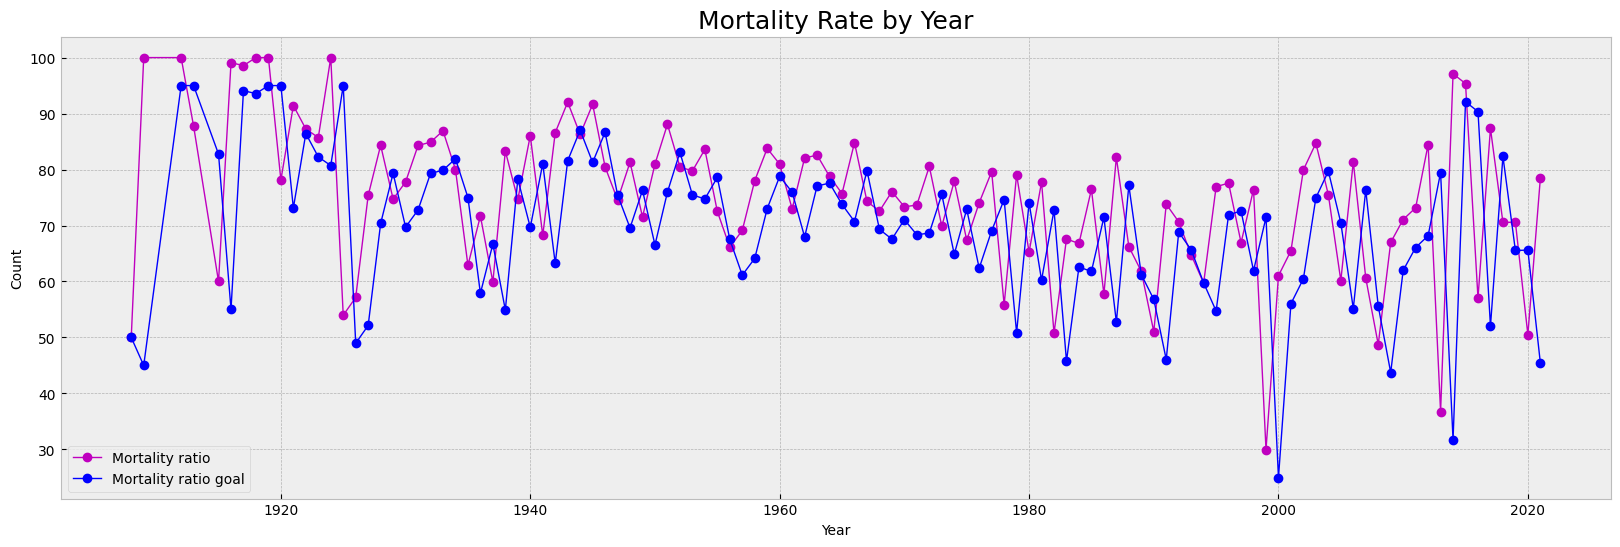

In [133]:
df.dropna(subset=["All Fatalities","All Aboard"],inplace=True)
All_fat = df.groupby(by=["Year"])["All Fatalities"].sum().reset_index()
All_Abo = df.groupby(by=["Year"])["All Aboard"].sum().reset_index()
All = All_Abo.merge(All_fat, on="Year")
All["M-rate"]=100*All["All Fatalities"]/All["All Aboard"]
All["M-goal"] = 100*All["All Fatalities"]/All["All Aboard"]
for i in range (All.shape[0]-1):
    All["M-goal"].iloc[i+1]=All["M-rate"].iloc[i]-5

plt.figure(figsize=(20, 6))
plt.style.use('bmh')
plt.plot(All['Year'], All['M-rate'],
         color='m', marker="o", linewidth=1,label="Mortality ratio")
plt.plot(All['Year'], All['M-goal'],
         color='b', marker="o", linewidth=1, label="Mortality ratio goal")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Mortality Rate by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()


In [134]:
All[["Year", "M-rate", "M-goal"]].set_index("Year").iplot(kind='line', xTitle='Years', yTitle='Rate',
                                                             title='Mortality Rate (1908-2021)')


C:\Users\angeo\AppData\Local\Temp\ipykernel_31040\2354714919.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



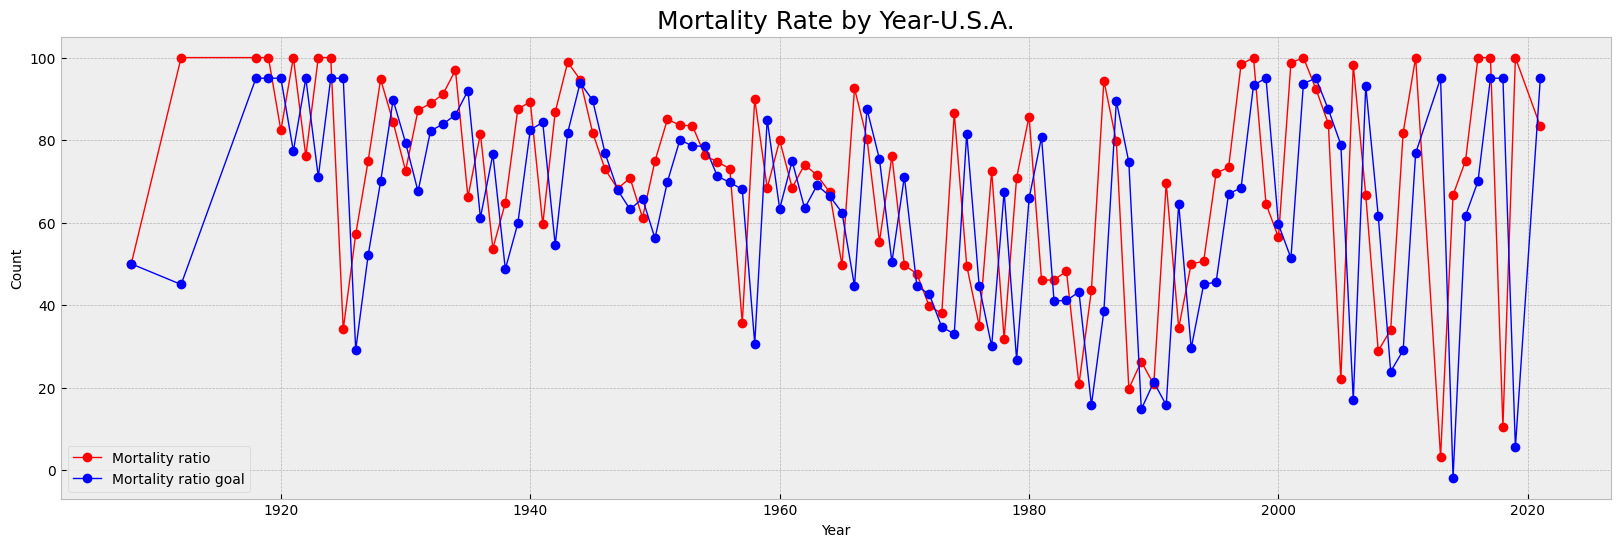

In [135]:
All_fat = df.groupby(by=["Year","Country"])["All Fatalities","All Aboard"].sum().reset_index()
All_fat1=All_fat[All_fat["Country"] == "United States of America"].reset_index(drop=True)
All_fat1["M-rate"] = 100*All_fat1["All Fatalities"]/All_fat1["All Aboard"]
All_fat1["M-goal"] = 100*All_fat1["All Fatalities"]/All_fat1["All Aboard"]
for i in range(All_fat1.shape[0]-1):
    All_fat1["M-goal"].iloc[i+1] = All_fat1["M-rate"].iloc[i]-5

plt.figure(figsize=(20, 6))
plt.style.use('bmh')
plt.plot(All_fat1['Year'], All_fat1['M-rate'],
         color='r', marker="o", linewidth=1, label="Mortality ratio")
plt.plot(All_fat1['Year'], All_fat1['M-goal'],
         color='b', marker="o", linewidth=1, label="Mortality ratio goal")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Mortality Rate by Year-U.S.A.', loc='Center', fontsize=18)
plt.legend()
plt.show()


In [136]:
All_fat1[["Year", "M-rate", "M-goal"]].set_index("Year").iplot(kind='line', xTitle='Years', yTitle='Rate',
                                                             title='Mortality Rate-USA (1908-2021)')

### SECOND KPI- ACCIDENT FATALITY RATE

Number of accidents with fatalities/Total number of accidents

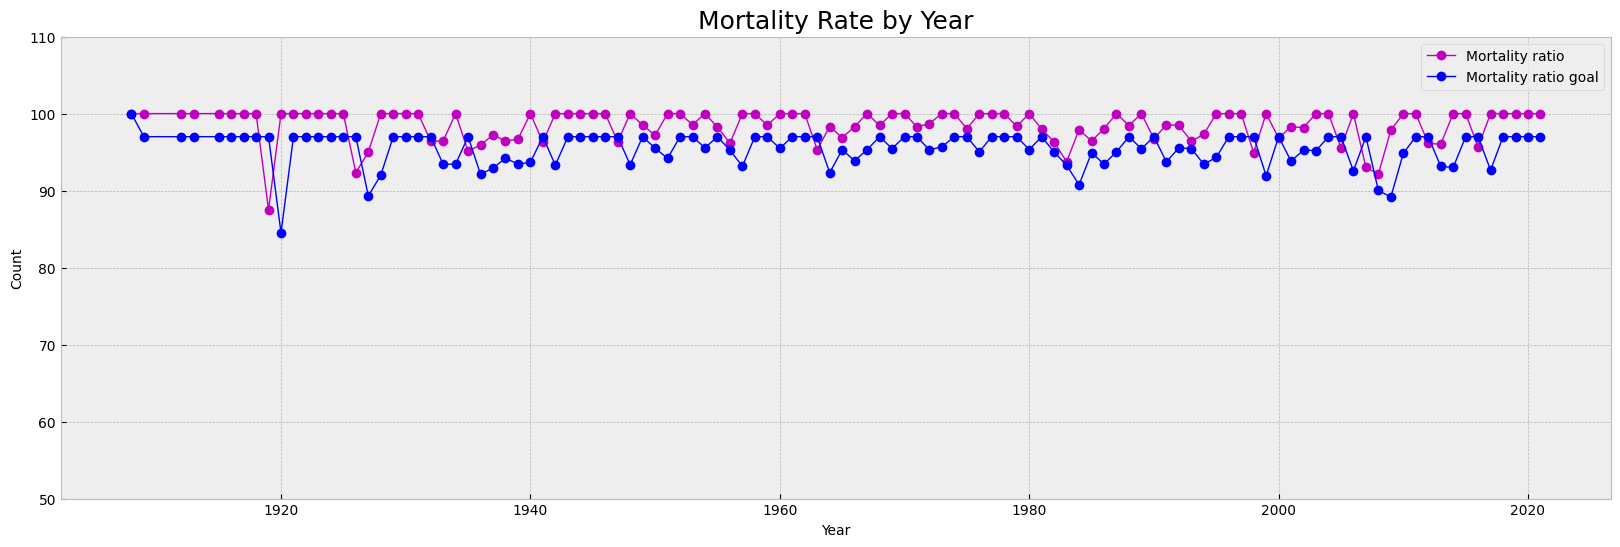

In [145]:
df1=df[df["All Fatalities"]>0]
All_fat = df.groupby(by=["Year"])["All Fatalities"].count().reset_index()
All_fat1 = df1.groupby(by=["Year"])["All Fatalities"].count().reset_index()
All_fat2 = All_fat.merge(All_fat1, on="Year")
All_fat2["Rate"] = 100*All_fat2["All Fatalities_y"].divide(All_fat2["All Fatalities_x"])
All_fat2["Rate_g"]=All_fat2["Rate"]
for i in range(All_fat2.shape[0]-1):
    All_fat2["Rate_g"].iloc[i+1] = All_fat2["Rate"].iloc[i]-3
plt.figure(figsize=(20, 6))
plt.style.use('bmh')
plt.plot(All_fat2['Year'], All_fat2['Rate'],
         color='m', marker="o", linewidth=1, label="Mortality ratio")
plt.plot(All_fat2['Year'], All_fat2['Rate_g'],
         color='b', marker="o", linewidth=1, label="Mortality ratio goal")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.ylim([50, 110])
plt.title('Mortality Rate by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()



In [130]:
All_fat2[["Year", "Rate", "Rate_g"]].set_index("Year").iplot(kind='line', xTitle='Years', yTitle='Rate',
                                                             title='Accidente Death Rate (1908-2021)')

### THIRD KPI- ACCIDENT DEATH RATE


Number of fatalities/Total number of accidents

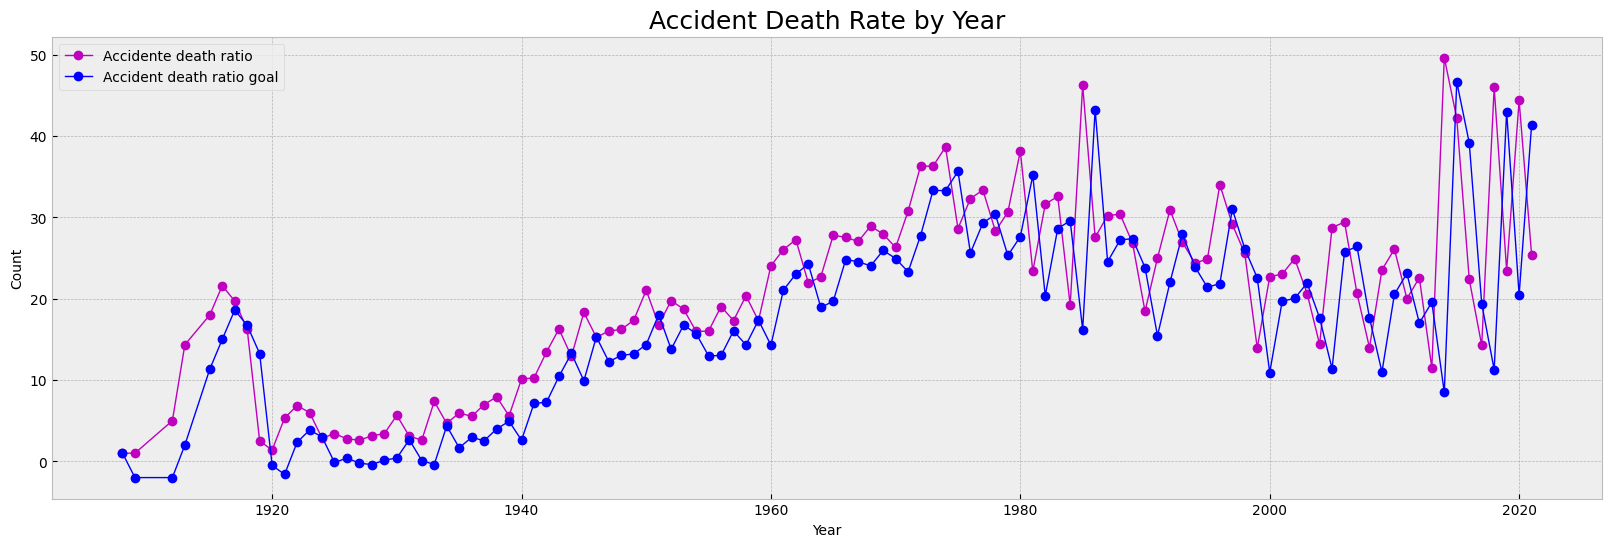

In [138]:
All_fat = df.groupby(by=["Year"])["All Fatalities"].count().reset_index()
All_fat1 = df.groupby(by=["Year"])["All Fatalities"].sum().reset_index()
All_fat2 = All_fat.merge(All_fat1, on="Year")
All_fat2["Rate"] = All_fat2["All Fatalities_y"].divide(All_fat2["All Fatalities_x"])
All_fat2["Rate_g"] = All_fat2["Rate"]
for i in range(All_fat2.shape[0]-1):
    All_fat2["Rate_g"].iloc[i+1] = All_fat2["Rate"].iloc[i]-3
plt.figure(figsize=(20, 6))
plt.style.use('bmh')
plt.plot(All_fat2['Year'], All_fat2['Rate'],
         color='m', marker="o", linewidth=1, label="Accidente death ratio")
plt.plot(All_fat2['Year'], All_fat2['Rate_g'],
         color='b', marker="o", linewidth=1, label="Accident death ratio goal")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Accident Death Rate by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()


In [128]:
All_fat2[["Year", "Rate", "Rate_g"]].set_index("Year").iplot(kind='line', xTitle='Years', yTitle='Rate',
                                                             title='Accidente Death Rate (1908-2021)')


### FOURTH KPI- VARIATION ACCIDENTS RATE

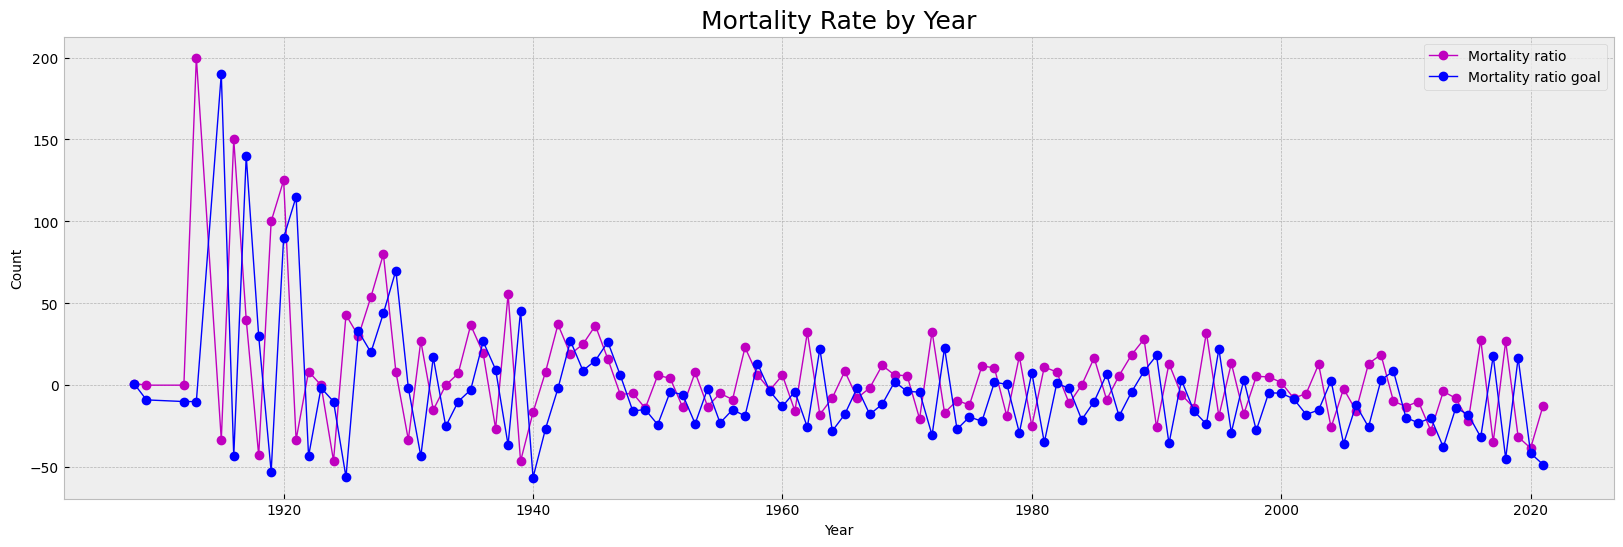

In [154]:
df1 = df[df["All Fatalities"] >= df["All Aboard"]]
All_fat = df.groupby(by=["Year"])["All Fatalities"].count().reset_index()
All_fat["Rate"]=All_fat["All Fatalities"]
All_fat["Rate_G"]=All_fat["All Fatalities"]
for i in range(All_fat.shape[0]-1):
    All_fat["Rate"].iloc[i+1] = 100*(All_fat["All Fatalities"].iloc[i+1] -
                                 All_fat["All Fatalities"].iloc[i])/All_fat["All Fatalities"].iloc[i]
All_fat["Rate_G"]=All_fat["Rate"]
for i in range(All_fat.shape[0]-1):
    All_fat["Rate_G"].iloc[i+1] = All_fat["Rate"].iloc[i]-10
plt.figure(figsize=(20, 6))
plt.style.use('bmh')
plt.plot(All_fat['Year'], All_fat['Rate'],
         color='m', marker="o", linewidth=1, label="Mortality ratio")
plt.plot(All_fat['Year'], All_fat['Rate_G'],
         color='b', marker="o", linewidth=1, label="Mortality ratio goal")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Mortality Rate by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()


In [156]:
All_fat[["Year", "Rate", "Rate_G"]].set_index("Year").iplot(kind='line', xTitle='Years', yTitle='Rate',
                                                          title='Mortality Rate (1908-2021)')
